In [1]:
import numpy as np
import pickle as pickle
import scipy.interpolate as interp
import scipy.signal as signal
import scipy.optimize as opti
import scipy, sys, time
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
from tqdm import tqdm

In [2]:
x = np.full([499,999,11],19.32)

In [3]:
rhopath = '/home/analysis_user/New_trap_code/SensitivityFramework/results/rho_arr.p' 
rho, xx, yy, zz = pickle.load(open(rhopath, 'rb'), encoding="latin1") # first change, encoding to latin1 instead of ASCII


In [4]:
# xx and yy are 200x200 tables containing the x and y coordinates as values
# mgrid is a mesh creation helper
xx, yy = np.mgrid[:200, :200]
# circles contains the squared distance to the (100, 100) point
# we are just using the circle equation learnt at school
circle = (xx - 100) ** 2 + (yy - 100) ** 2
# donuts contains 1's and 0's organized in a donut shape
# you apply 2 thresholds on circle to define the shape
donut = np.logical_and(circle < (6400 + 60), circle > (6400 - 60))

In [5]:
donut

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

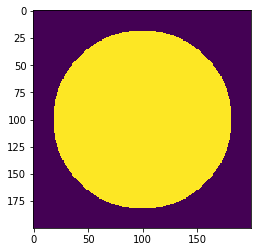

In [17]:
import matplotlib.pyplot as plt
from skimage import draw
arr = np.zeros((200, 200))
stroke = 3
# Create an outer and inner circle. Then subtract the inner from the outer.
radius = 80
inner_radius = radius - (stroke // 2) + (stroke % 2) - 1 
outer_radius = radius + ((stroke + 1) // 2)
ri, ci = draw.circle(100, 100, radius=inner_radius, shape=arr.shape)
ro, co = draw.circle(100, 100, radius=outer_radius, shape=arr.shape)
arr[ro, co] = 1
#arr[ri, ci] = 0
plt.imshow(arr)
plt.show()